<a href="https://colab.research.google.com/github/eledesma/EstadisticaICESI/blob/main/water_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller de Repaso

Tenemos como objetivo clasificar, dadas las características, si el agua es o no potable y qué variables explican mejor este fenómeno

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

# Leer el Dataset y su estructura

In [ ]:
data="/content/water_potability.csv"


In [ ]:
df=pd.read_csv(data)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Estructura del dataset

In [ ]:
# Tamaño

df.shape

(3276, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


## ¿ Qué hacemos con los Nulos?

Vamos a Optar por la imputación a traves de la mediana. Esto debido a que son variables numéricas y la mediana es menos sensible a valores atípicos que la media

In [ ]:
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

<ipython-input-16-7b45280fe35d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].median(), inplace=True)
<ipython-input-16-7b45280fe35d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Analizar la Distribución

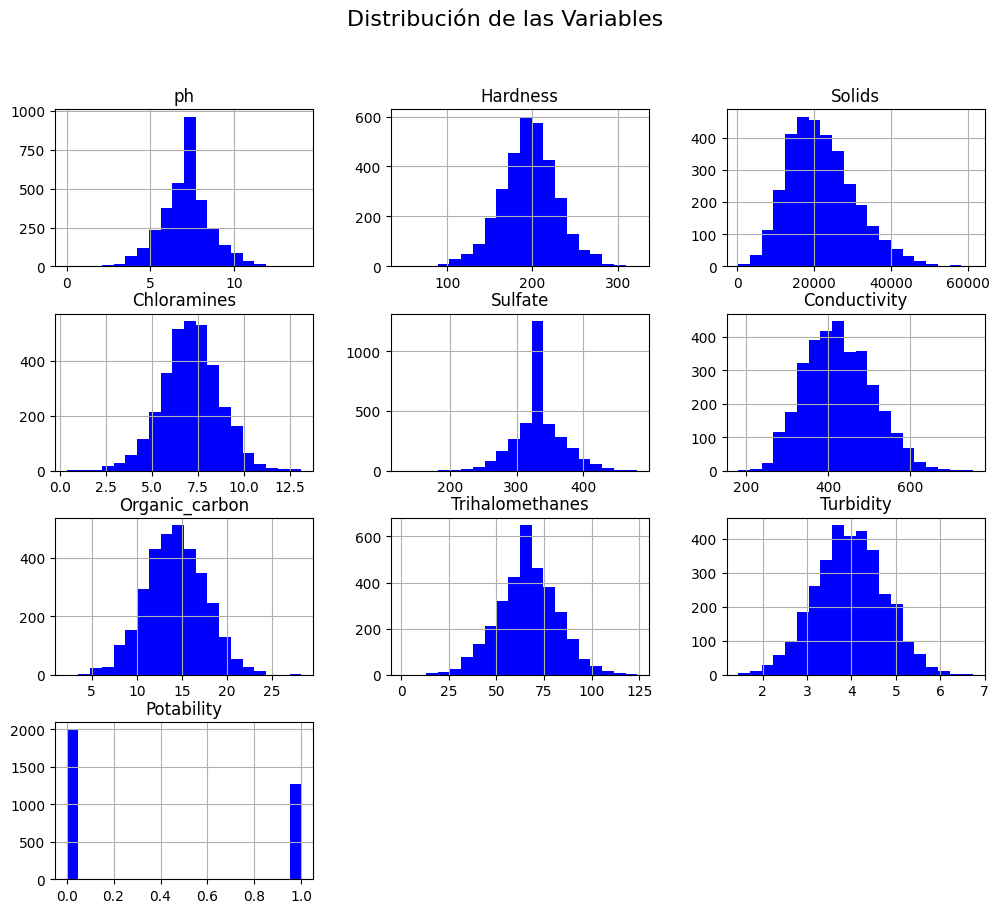

In [ ]:
# Generar histogramas para todas las columnas numéricas
df.hist(figsize=(12, 10), bins=20, color='blue')
plt.suptitle('Distribución de las Variables', fontsize=16)
plt.show()


In [ ]:
# Filtrar solo las columnas numéricas
X = df.select_dtypes(include=['float64', 'int64'])

# Diccionario para almacenar resultados de normalidad
normality_results = {}

# Aplicar la prueba de Shapiro-Wilk
for column in X.columns:
    # Eliminar nulos temporalmente para Shapiro-Wilk
    data = X[column].dropna()
    stat, p_value = shapiro(data)
    normality_results[column] = {'Estadístico': stat, 'p-valor': p_value}

# Convertir resultados en DataFrame
normality_results_df = pd.DataFrame(normality_results).T
normality_results_df['Normalidad'] = normality_results_df['p-valor'] > 0.05
normality_results_df


,Estadístico,p-valor,Normalidad
ph,0.979725,3.061880e-21,False
Hardness,0.995969,9.609729e-08,False
Solids,0.977726,2.951167e-22,False
Chloramines,0.996773,1.818109e-06,False
Sulfate,0.958988,1.797071e-29,False
Conductivity,0.992968,1.494154e-11,False
Organic_carbon,0.999523,6.251250e-01,True
Trihalomethanes,0.996965,3.874687e-06,False
Turbidity,0.999698,9.335788e-01,True
Potability,0.618822,5.642800e-65,False


# Matriz de Correlación

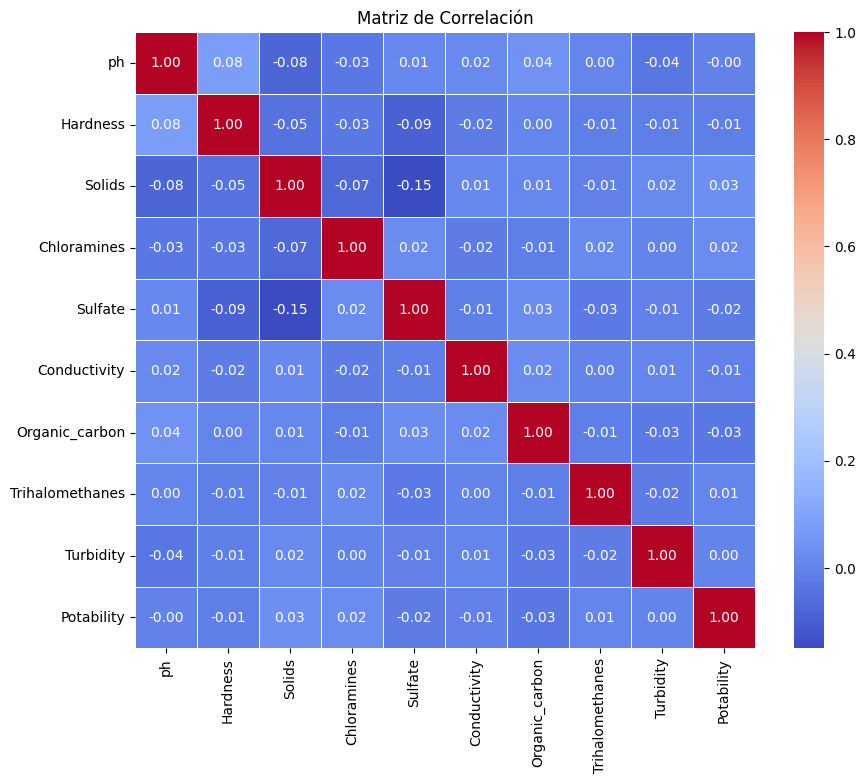

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación")
plt.show()


In [ ]:

correlation_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075760,-0.082004,-0.031741,0.014178,0.017466,0.040240,0.003145,-0.036107,-0.003014
Hardness,0.075760,1.000000,-0.046899,-0.030054,-0.092833,-0.023915,0.003610,-0.012707,-0.014449,-0.013837
Solids,-0.082004,-0.046899,1.000000,-0.070148,-0.149747,0.013831,0.010242,-0.008799,0.019546,0.033743
Chloramines,-0.031741,-0.030054,-0.070148,1.000000,0.023762,-0.020486,-0.012653,0.016614,0.002363,0.023779
Sulfate,0.014178,-0.092833,-0.149747,0.023762,1.000000,-0.014182,0.027102,-0.025657,-0.009767,-0.020476
Conductivity,0.017466,-0.023915,0.013831,-0.020486,-0.014182,1.000000,0.020966,0.001184,0.005798,-0.008128
Organic_carbon,0.040240,0.003610,0.010242,-0.012653,0.027102,0.020966,1.000000,-0.012958,-0.027308,-0.030001
Trihalomethanes,0.003145,-0.012707,-0.008799,0.016614,-0.025657,0.001184,-0.012958,1.000000,-0.021487,0.006887
Turbidity,-0.036107,-0.014449,0.019546,0.002363,-0.009767,0.005798,-0.027308,-0.021487,1.000000,0.001581
Potability,-0.003014,-0.013837,0.033743,0.023779,-0.020476,-0.008128,-0.030001,0.006887,0.001581,1.000000


# ¿Qué podemos analizar?

1. No hay correlaciones fuertes entre las variables
2. Tenemos algunas correlaciones que se pueden destacar:  
* ph y Hardness: 0.08 → correlación positiva muy débil.
* Solids y Sulfate: -0.17 → correlación negativa débil.
* Solids y Potability: 0.03 → correlación casi nula.
3. Las demás variables tienen correlaciones muy cercanas a 0, indicando que no tienen una relación lineal fuerte entre sí

# Decisión

Vamos a aplicar StandardScaler (Estandarización)  porque los datos no tienen normalidad y algunas variables presentan valores extremos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seleccionar solo las columnas numéricas
X_numeric = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Potability'])

# Aplicar StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Convertir el resultado a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)

# Agregar la columna 'Potability' nuevamente
X_scaled_df['Potability'] = df['Potability']

X_scaled_df.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298,0
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218,0
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365,0
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412,0
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786,0


# Regresión Lineal ?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Eliminar filas con nulos antes de entrenar el modelo
X_clean = X_scaled_df.dropna()

# Separar variables independientes y dependientes
X = X_clean.drop(columns=['Potability'])
y = X_clean['Potability']

# Dividir en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(0.23366700272516455, -0.00027179775521668503)

## El R² negativo indica que el modelo no logra explicar la variabilidad de los datos mejor que una predicción constante (media de Potability). Esto confirma que la regresión lineal no es adecuada para este problema

# PCA

In [ ]:
from sklearn.decomposition import PCA

# Aplicar PCA a los datos escalados
pca = PCA()
X_pca = pca.fit_transform(X)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X.shape[1])])

# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio_cumsum = explained_variance_ratio.cumsum()

explained_variance_ratio_cumsum


array([0.13337387, 0.25969999, 0.37703602, 0.49073778, 0.60119249,
       0.70863091, 0.81430101, 0.91280269, 1.        ])

# No hubo Reducción significativa de dimensión

# Clasificar

**Para Clasificar este problema vamos a proponer un nuevo modelo que es el Random forest**

"El Random Forest es un modelo de aprendizaje automático basado en la combinación de múltiples árboles de decisión para mejorar la precisión y reducir el riesgo de sobreajuste. Funciona construyendo un conjunto (o "bosque") de árboles, donde cada árbol se entrena con una muestra aleatoria de los datos y selecciona características aleatorias para dividir los nodos"



In [ ]:
# Importar librerías
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Suponiendo que 'X' son las características y 'y' la variable objetivo
X = df.drop(columns=['Potability']).dropna()  # Eliminar nulos antes del PCA
y = df['Potability'].loc[X.index]  # Alinear y con X sin nulos

# Aplicar PCA (reducir a 6 componentes principales)
pca = PCA(n_components=6)
X_pca_reduced = pca.fit_transform(X)
print(f"Forma de los datos después del PCA: {X_pca_reduced.shape}")

# Dividir las clases manualmente
class_0 = X_pca_reduced[y == 0]
class_1 = X_pca_reduced[y == 1]

# Definir un tamaño equilibrado (usar la cantidad mínima entre las dos clases)
min_size = min(len(class_0), len(class_1))
X_balanced = np.vstack([class_0[:min_size], class_1[:min_size]])
y_balanced = np.hstack([np.zeros(min_size), np.ones(min_size)])

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Entrenar el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Resultados
print(f"Precisión del modelo: {accuracy:.4f}")
print("\nMatriz de Confusión:")
print(conf_matrix)
print("\nReporte de Clasificación:")
print(report)


Forma de los datos después del PCA: (3276, 6)
Precisión del modelo: 0.6230

Matriz de Confusión:
[[170  95]
 [ 98 149]]

Reporte de Clasificación:
              precision    recall  f1-score   support

         0.0       0.63      0.64      0.64       265
         1.0       0.61      0.60      0.61       247

    accuracy                           0.62       512
   macro avg       0.62      0.62      0.62       512
weighted avg       0.62      0.62      0.62       512




El modelo  con reducción de dimensionalidad mediante PCA logró una precisión del 62.3% al clasificar si el agua es potable o no.

La matriz de confusión muestra que el modelo identificó correctamente 170 casos de agua no potable (clase 0) y 149 casos de agua potable (clase 1).

Sin embargo, también presentó 95 falsos positivos (clasificó agua no potable como potable) y 98 falsos negativos (clasificó agua potable como no potable).

En cuanto a las métricas de clasificación:

La precisión es ligeramente mayor para la clase 0 (63%) que para la clase 1 (61%), lo que indica que el modelo es un poco más confiable al identificar agua no potable.
El recall (cobertura) es similar para ambas clases, con un valor cercano al 60%, lo que significa que el modelo logra recuperar la mayoría de los casos de ambas clases, aunque con un margen de error notable.
El F1-score promedio ponderado es del 62%, reflejando un equilibrio razonable entre precisión y recall.

En este caso, Random Forest fue una buena elección porque:

Es robusto ante datos desbalanceados y puede manejar relaciones no lineales entre las variables.
Tolera bien la presencia de ruido y características menos relevantes, ya que selecciona aleatoriamente las características al construir cada árbol.
Al haber reducido las dimensiones de los datos mediante PCA, el modelo puede trabajar más eficientemente al enfocarse en los componentes principales que capturan la mayor parte de la información.

Para profundizar mas sobre este metodo de ensamble

[Random Forest](https://www.ibm.com/topics/random-forest#:~:text=Random%20forest%20is%20a%20commonly,both%20classification%20and%20regression%20problems.)

[Visita](https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.RandomForestClassifier.html) : En este enlace encontrarás este y otros modelos que puedes empezar a explorar